# A/B Testing with Python

`#pandas #marketing #a_b_testing #data_visualiztion`

## Identifying and understanding KPIs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
sns.set_palette("Paired", 12)

In [3]:
# load customer demographics data
customer_demographics = pd.read_csv("../../Data/abtesting/user_demographics_v1.csv")
print(customer_demographics.head())

          uid              reg_date device gender country  age
0  54030035.0  2017-06-29T00:00:00Z    and      M     USA   19
1  72574201.0  2018-03-05T00:00:00Z    iOS      F     TUR   22
2  64187558.0  2016-02-07T00:00:00Z    iOS      M     USA   16
3  92513925.0  2017-05-25T00:00:00Z    and      M     BRA   41
4  99231338.0  2017-03-26T00:00:00Z    iOS      M     FRA   59


## Quick Exploratory Analysis

In [4]:
customer_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   uid       10000 non-null  float64
 1   reg_date  10000 non-null  object 
 2   device    10000 non-null  object 
 3   gender    10000 non-null  object 
 4   country   10000 non-null  object 
 5   age       10000 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 468.9+ KB


In [5]:
# convert reg_date to datetime
customer_demographics["reg_date"] = pd.to_datetime(
    customer_demographics["reg_date"], format="%Y-%m-%d"
)

In [6]:
# device feature: value counts
customer_demographics["device"].value_counts()

and    5810
iOS    4190
Name: device, dtype: int64

In [7]:
# convert device feature to category type
customer_demographics["device"] = customer_demographics["device"].astype("category")
customer_demographics["gender"] = customer_demographics["gender"].astype("category")
customer_demographics["country"] = customer_demographics["country"].astype("category")
customer_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   uid       10000 non-null  float64            
 1   reg_date  10000 non-null  datetime64[ns, UTC]
 2   device    10000 non-null  category           
 3   gender    10000 non-null  category           
 4   country   10000 non-null  category           
 5   age       10000 non-null  int64              
dtypes: category(3), datetime64[ns, UTC](1), float64(1), int64(1)
memory usage: 264.2 KB


In [8]:
customer_demographics.describe()

,uid,age
count,1.000000e+04,10000.000000
mean,5.580304e+07,24.399200
std,2.562174e+07,9.772512
min,1.111609e+07,15.000000
25%,3.392627e+07,17.000000
50%,5.627628e+07,21.000000
75%,7.786440e+07,28.000000
max,9.999648e+07,84.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb886e72650>,
      dtype=object)

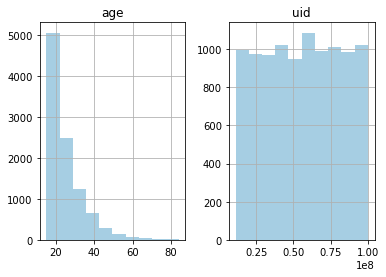

In [9]:
customer_demographics.hist()

In [10]:
# datetime
customer_demographics["reg_date"].dt.year.value_counts()

2017    4916
2018    2482
2016    2027
2015     575
Name: reg_date, dtype: int64

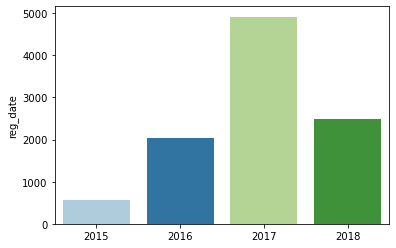

In [11]:
tempdf = pd.DataFrame(customer_demographics["reg_date"].dt.year.value_counts())
sns.barplot(data=tempdf, x=tempdf.index, y="reg_date")

In [12]:
pd.DataFrame(customer_demographics["reg_date"].dt.month.value_counts())

,reg_date
2,1272
3,1254
1,1132
12,1009
11,842
10,781
9,716
8,708
7,680
6,579


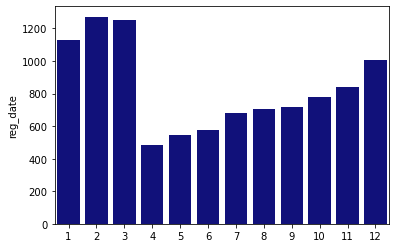

In [50]:
tempdf = pd.DataFrame(customer_demographics["reg_date"].dt.month.value_counts())
sns.barplot(data=tempdf, x=tempdf.index, y="reg_date", color="darkblue")

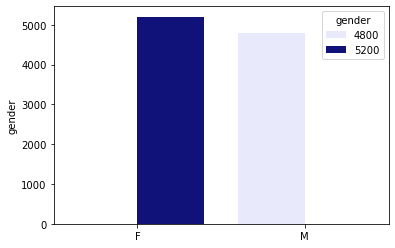

In [52]:
tempdf = pd.DataFrame(customer_demographics["gender"].value_counts())
sns.barplot(data=tempdf, x=tempdf.index, y="gender", color='darkblue', hue="gender")

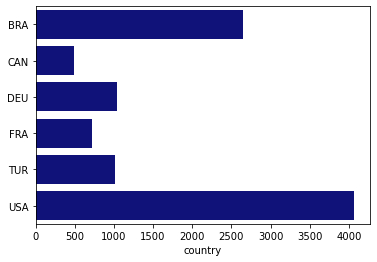

In [56]:
tempdf = pd.DataFrame(customer_demographics["country"].value_counts())
sns.barplot(data=tempdf, x="country", y=tempdf.index, color='darkblue')